## EDA

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
himovies_df=pd.read_csv('data\Clean_df.csv')
himovies_df

,Movie_Name,Release_Year,IMDB_Score,Genres,Casts,Duration,Country,Production
0,Operation Mincemeat,2022,6.9,"Drama,History,War","MarkBonnar,HattieMorahan,JohnnyFlynn,MatthewMa...",128,UnitedKingdom,"ArcheryPictures,AFilmLocationCompany,CohenMedi..."
1,Memory,2022,5.6,"Crime,Thriller,Action,Mystery","LiamNeeson,TajAtwal,MonicaBellucci,HaroldTorre...",114,UnitedStatesofAmerica,"BlackBearPictures,SavilleProductions,OpenRoadF..."
2,Stanleyville,2021,5.6,Comedy,"JulianRichings,GeorgeTchortov,ChristianSerriti...",88,Canada,"ScythiaFilms,Anthropoid"
3,Scarborough,2021,7.1,Drama,"EssenceFox,ElliePosadas,LiamDiaz,CherishViolet...",136,Canada,"CompyFilms,levelFILM"
4,It's Hard But It's Fair,2022,5.6,Drama,"Osaze'Agod'Niamke,Derrick'Deuce'Keys,Moonrise'...",74,UnitedStatesofAmerica,MemphvilleManagementandDistribution
...,...,...,...,...,...,...,...,...
29376,The Shooting,1966,6.5,Western,"WarrenOates,WillHutchins,MilliePerkins,JackNic...",78,UnitedStatesofAmerica,"ProteusFilms,SantaClaraProductions"
29377,The Con Artists,2014,6.5,"Thriller,Action,Crime","KimWoo-bin,LeeHyun-woo,KimYeong-cheol,JoYoon-h...",116,SouthKorea,LotteEntertainment
29378,And There Were 4,2018,4.6,"Action,Drama,Fantasy","ShadnerIfrene,NathanielRyanJ,MysonneLinen,BekM...",83,UnitedStatesofAmerica,XXX
29379,From Time to Time,2009,6.7,"Adventure,Fantasy,Drama","MaggieSmith,DominicWest,TimothySpall,Alexander...",95,UnitedKingdom,"LionheadStudios,EalingStudios"


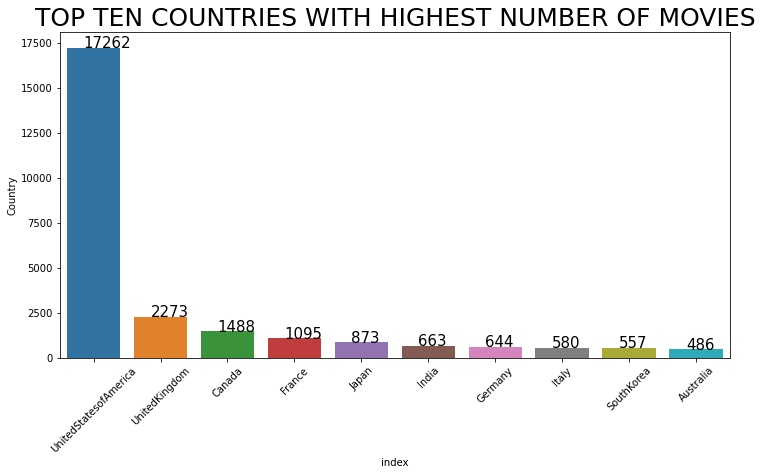

In [3]:
m=himovies_df["Country"]
movies=m.value_counts().reset_index()[0:10]
plt.figure(figsize=(12,6))
plt.title("TOP TEN COUNTRIES WITH HIGHEST NUMBER OF MOVIES",fontsize=25)
ax=sns.barplot(x=movies["index"],y=movies["Country"])
plt.xticks(rotation =45)
for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='black')

### • The graph shows us that America is the country that produces the most films, by a large margin from the other countries.
### • In the other countries, we see that the number of movies homogeneous.

Text(0, 0.5, 'Frequency')

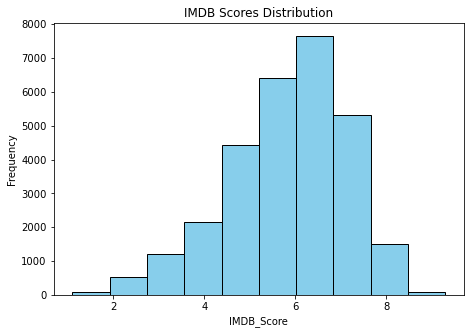

In [4]:
fig = plt.figure(figsize=(25, 5))
fig1 = fig.add_subplot(1,3,1)

fig1.hist(himovies_df.IMDB_Score,color="skyblue",edgecolor='black')
fig1.set_title('IMDB Scores Distribution')
fig1.set_xlabel("IMDB_Score")
fig1.set_ylabel("Frequency")

### • This histogram shows us that most of the films’ IMDB scores lie between around 5.5–7.5

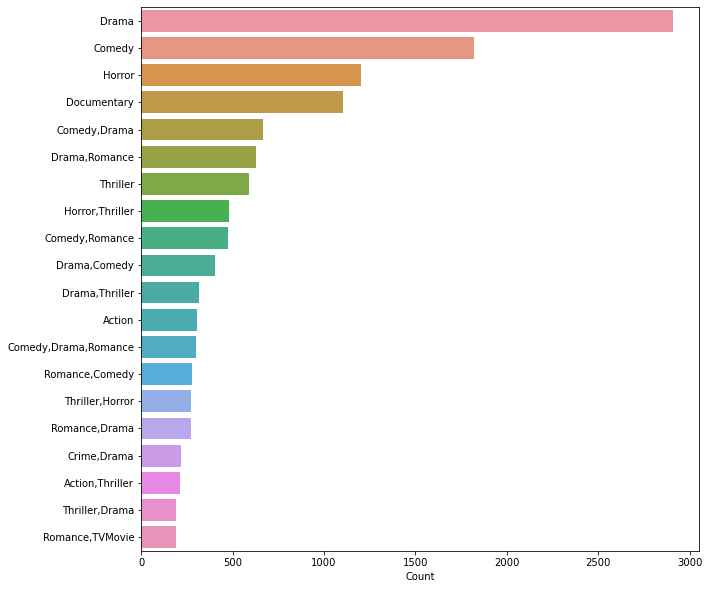

In [5]:
y=himovies_df.groupby("Genres")['Genres'].count().nlargest(20)
x = y.index
 
plt.figure(figsize=(10,10))
ax = sns.barplot(x= y, y = x)
ax.set(xlabel = 'Count')
ax.set(ylabel = '')

plt.show()

### • From this, we can see that most of our data is about the drama genre.

## We decided to split the genres column to get a better perspective on each film.

In [6]:
for idx,row in enumerate (himovies_df['Genres']):
    himovies_df['Genres'].at[idx] = row.split(",")[0]        

himovies_df = himovies_df[himovies_df["Genres"].str.contains("TVMovie") == False]

In [7]:
genre_filter=himovies_df['Genres'].value_counts().loc[lambda x: x>300].to_frame()
genre_filter

,Genres
Drama,6954
Comedy,4973
Action,2954
Horror,2709
Thriller,2132
Romance,1386
Documentary,1348
Crime,1174
Adventure,1052
ScienceFiction,718


### • Since there have been many movies with different genres over the years, we’ll only analyze a few of the common genres from 2010 onwards

In [8]:
temp_df = himovies_df[himovies_df["Genres"].str.contains("Drama|Comedy|Action|Horror|Thriller|Romance|Documentary|Adventure" ) == True]
temp_df = temp_df[temp_df['Release_Year']>=2010]

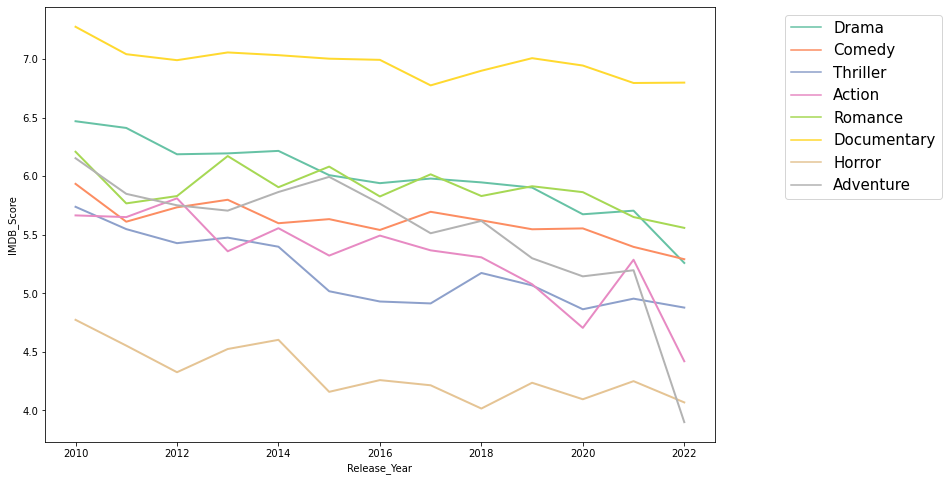

In [9]:
# plotting the genre_filter in a line plot along with the years 
g=sns.lineplot(data=temp_df, x=temp_df["Release_Year"], y=temp_df['IMDB_Score'],
               hue=temp_df["Genres"], ci=None,linewidth = 2, palette="Set2")
g.legend(loc='upper right', bbox_to_anchor=(1.35, 1), prop={'size': 15})
fig = plt.gcf()
fig.set_size_inches(12, 8)

### • In the lineplot graph, we can see that the Documentary genre leads in its IMDB score over the years since 2010, followed by the category of drama and finally the category of romance.


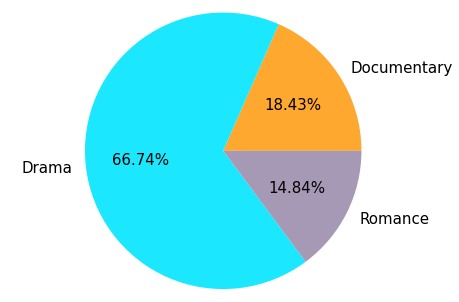

In [10]:
#storing the top 3 genres since 2010 with highest IMDB scores in a list 
list_of_genre= ["Documentary", "Drama", "Romance"] 

genre_list_count=[]
for i in range(0,3):
    genre_count=len(temp_df[temp_df['Genres'] == list_of_genre[i]])

    genre_list_count.append(genre_count) # appending the total count of each genre in the list

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
colorss = ['#FEA82F','#1BE7FF','#A599B5']
ax.pie(genre_list_count, labels = list_of_genre,autopct='%1.2f%%', colors=colorss,
       wedgeprops = {'linewidth': 3}, radius=1.2, textprops = {"fontsize":15})
plt.show()

### • The Pie graph shows the percentage amount of movies in the top genres above.



# Correlation

In [11]:
corr = himovies_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Release_Year,IMDB_Score,Duration
Release_Year,1.00,-0.30,-0.09
IMDB_Score,-0.30,1.00,0.35
Duration,-0.09,0.35,1.00


### • It can be seen that the correlation is not very high between these columns

Text(0, 0.5, 'Relative frequency')

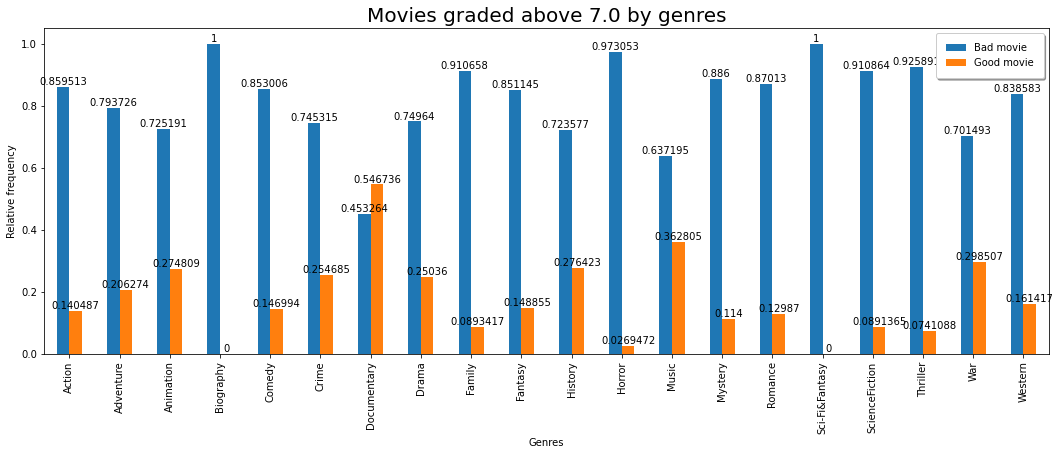

In [12]:
ct = pd.crosstab(himovies_df['Genres'],(himovies_df['IMDB_Score'] > 7) ,normalize="index")

ax = ct.plot(kind="bar", figsize=(18,6))
ax.legend(["Bad movie", "Good movie"],fancybox=True, framealpha=1, shadow=True, borderpad=1)

for container in ax.containers:
    ax.bar_label(container)
plt.title("Movies graded above 7.0 by genres", fontsize = 20)
plt.ylabel("Relative frequency")


### • The graph shows us movies by genres with IMDB score below 7 and above, which means it is a good movie
### • We can see that most of the good movies are mostly from the Documentary genre 